In [1]:
# Use hl as the standard abbreviation for the HamlinLab library
import hamlinlab as hl

import numpy as np # various numerical stuff with a useful array data structures
import pandas as pd # This is kind of like excel for python
import matplotlib.pyplot as plt # Standard plotting library
from scipy.optimize import curve_fit # General non-linear curve fitting

In [2]:
# This makes plots interactive (i.e. zoomable, etc).
%matplotlib widget

# These lines make it so that any imported libraries
# are automatically reloaded if they are updated.
# This is useful if you are keeping parts of your code
# in a seperate .py file, and are actively modifying that
# .py file while using it in jupyter-lab
# E.g. see the hl.example.hello() example below for code stored
# in an external module.
%load_ext autoreload
%autoreload 2

In [3]:
file = '../data/raw/0395_Mn5_220709.dc.dat'
df = pd.read_csv(file, skiprows=30)
df

,Time,Comment,Field (Oe),Temperature (K),Long Moment (emu),Long Scan Std Dev,Long Algorithm,Long Reg Fit,Long Percent Error (%),Trans Moment (emu),...,Trans Percent Error [w/o ABS] (%),Points per Scan,Scans per Measurement,Scan Length (cm),Delta Temp (K),Rot Position (deg),Error,EC Comp. Running,Using ABS,Unnamed: 30
0,1.657387e+09,NaN,100.0,5.002314,0.032304,0.000132,3,0.967589,0.408425,NaN,...,NaN,48,2,4.0,0.013578,0.0,0,NaN,0,NaN
1,1.657387e+09,NaN,100.0,10.000190,0.055988,0.000032,3,0.965275,0.057188,NaN,...,NaN,48,2,4.0,0.003884,0.0,0,NaN,0,NaN
2,1.657388e+09,NaN,100.0,14.998600,0.062013,0.000001,3,0.964711,0.001945,NaN,...,NaN,48,2,4.0,0.002300,0.0,0,NaN,0,NaN
3,1.657388e+09,NaN,100.0,19.998510,0.064772,0.000006,3,0.964493,0.008670,NaN,...,NaN,48,2,4.0,0.004650,0.0,0,NaN,0,NaN
4,1.657388e+09,NaN,100.0,25.000410,0.062394,0.000003,3,0.964719,0.004978,NaN,...,NaN,48,2,4.0,0.007990,0.0,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1.657463e+09,NaN,-4000.0,5.000093,-0.268456,0.000208,3,0.975256,0.077345,NaN,...,NaN,48,2,4.0,0.000542,0.0,0,NaN,0,NaN
171,1.657463e+09,NaN,-3000.0,5.000274,-0.252940,0.000125,3,0.975071,0.049522,NaN,...,NaN,48,2,4.0,0.000722,0.0,0,NaN,0,NaN
172,1.657464e+09,NaN,-2000.0,4.999889,-0.230715,0.000207,3,0.974562,0.089572,NaN,...,NaN,48,2,4.0,0.000993,0.0,0,NaN,0,NaN
173,1.657464e+09,NaN,-1000.0,5.000274,-0.190482,0.000141,3,0.973397,0.074201,NaN,...,NaN,48,2,4.0,0.000993,0.0,0,NaN,0,NaN


In [4]:
df['Time (m)'] = (df['Time'] - df['Time'].iloc[0]) / 60

Text(0.5, 1.0, '../data/raw/0395_Mn5_220709.dc.dat')

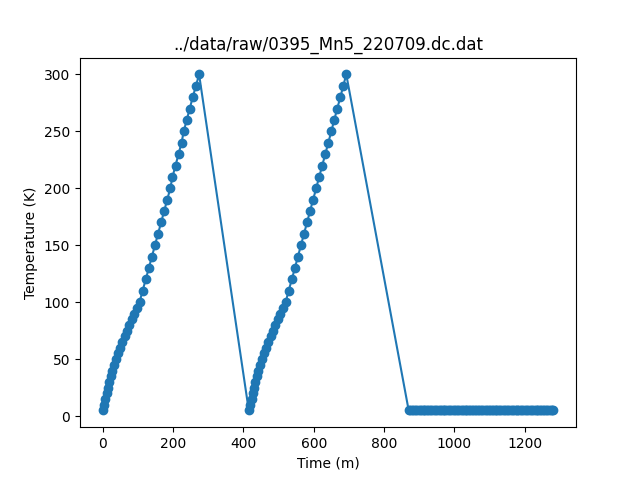

In [5]:
fig, ax = plt.subplots()
ax.plot(df['Time (m)'], df['Temperature (K)'], '-o')
ax.set_xlabel('Time (m)')
ax.set_ylabel('Temperature (K)')
ax.set_title(file)

Text(0.5, 1.0, '../data/raw/0395_Mn5_220709.dc.dat')

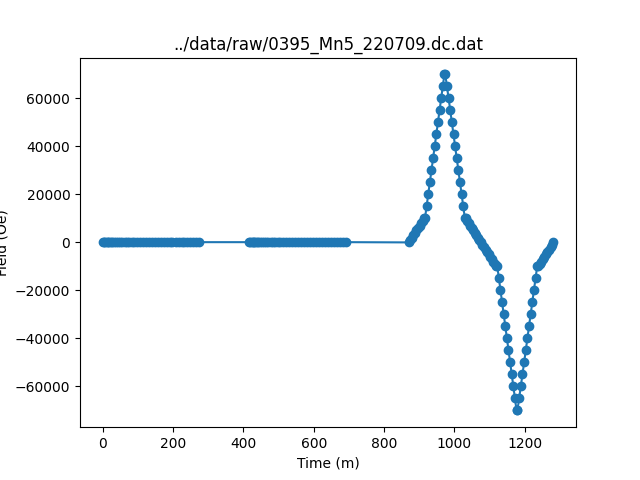

In [6]:
fig, ax = plt.subplots()
ax.plot(df['Time (m)'], df['Field (Oe)'], '-o')
ax.set_xlabel('Time (m)')
ax.set_ylabel('Field (Oe)')
ax.set_title(file)

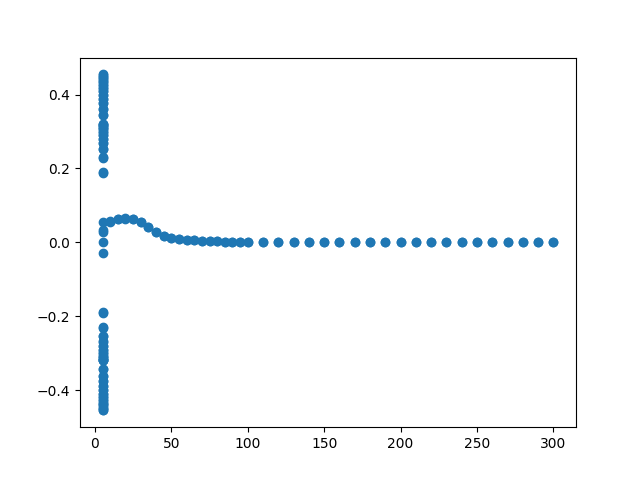

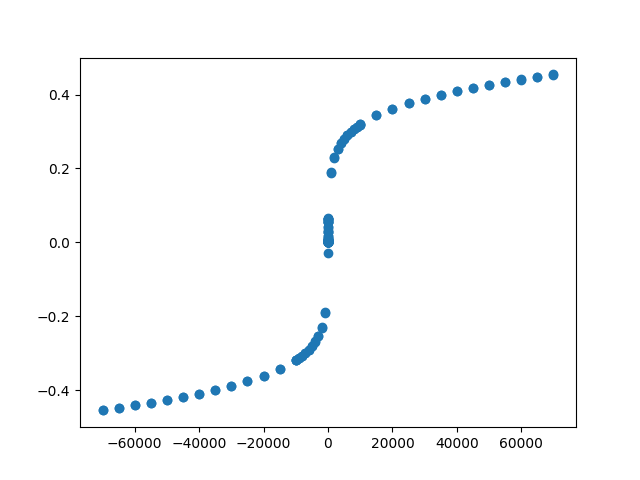

In [7]:
fig, ax = plt.subplots()
ax.plot(df['Temperature (K)'], df['Long Moment (emu)'], 'o')

fig, ax = plt.subplots()
ax.plot(df['Field (Oe)'], df['Long Moment (emu)'], 'o')

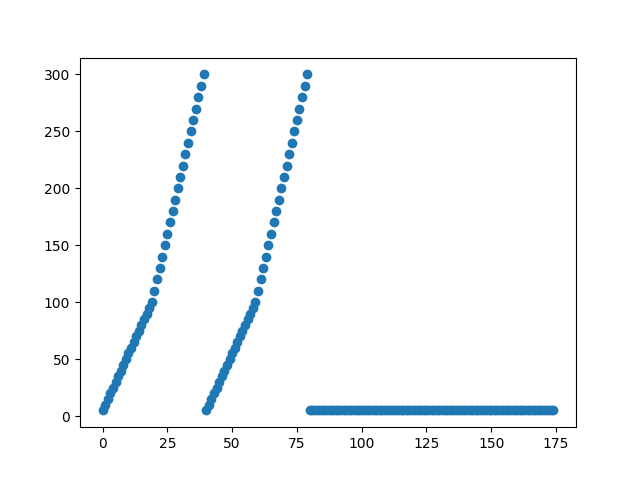

In [8]:
fig, ax = plt.subplots()
ax.plot(df.index, df['Temperature (K)'], 'o')

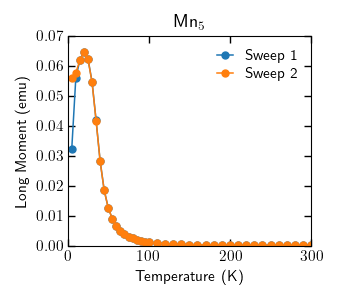

In [9]:
sweep_1 = df[:40]
sweep_2 = df[40:80]

with plt.style.context(hl.mplstyle.prb_regular):
    fig, ax = plt.subplots()
    ax.plot(
        sweep_1['Temperature (K)'],
        sweep_1['Long Moment (emu)'],
        '-o',
        label='Sweep 1'
    )

    ax.plot(
        sweep_2['Temperature (K)'],
        sweep_2['Long Moment (emu)'],
        '-o',
        label='Sweep 2'
    )

    ax.set_xlim(0, 300)
    ax.set_ylim(0, 0.07)
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Long Moment (emu)')
    ax.set_title('Mn$_5$')
    ax.legend()

    plt.savefig(hl.pub_ready_dir / 'myplot.pdf')

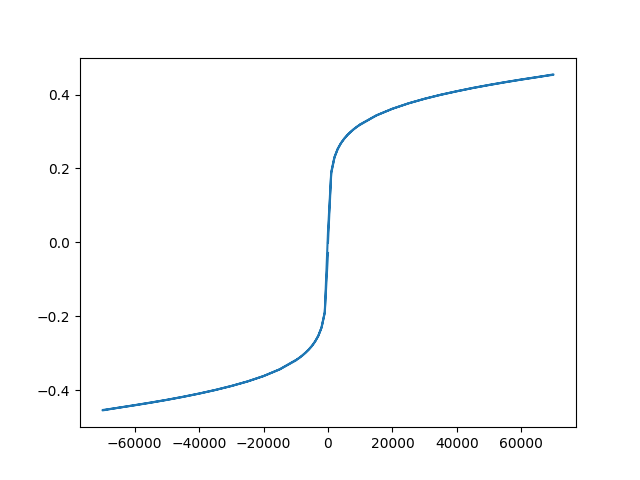

In [11]:
sweep_3 = df[80:]
fig, ax = plt.subplots()
ax.plot(sweep_3['Field (Oe)'], sweep_3['Long Moment (emu)'])